In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
data = pd.read_csv('house_rental_data.csv')
data.head()

,Unnamed: 0,Sqft,Floor,TotalFloor,Bedroom,Living.Room,Bathroom,Price
0,1,1177.698,2,7,2,2,2,62000
1,2,2134.800,5,7,4,2,2,78000
2,3,1138.560,5,7,2,2,1,58000
3,4,1458.780,2,7,3,2,2,45000
4,5,967.776,11,14,3,2,2,45000


In [4]:
data.drop(['Unnamed: 0'],axis = 1)

,Sqft,Floor,TotalFloor,Bedroom,Living.Room,Bathroom,Price
0,1177.698,2,7,2,2,2,62000
1,2134.800,5,7,4,2,2,78000
2,1138.560,5,7,2,2,1,58000
3,1458.780,2,7,3,2,2,45000
4,967.776,11,14,3,2,2,45000
...,...,...,...,...,...,...,...
640,1359.156,7,15,3,2,2,45000
641,377.148,4,10,1,1,1,24800
642,740.064,13,14,1,1,1,45000
643,1707.840,3,14,3,2,2,65000


In [5]:
data.isnull().sum()

Unnamed: 0     0
Sqft           0
Floor          0
TotalFloor     0
Bedroom        0
Living.Room    0
Bathroom       0
Price          0
dtype: int64

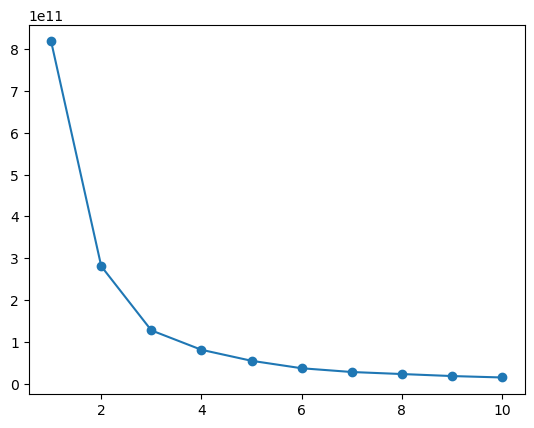

In [9]:
from sklearn.cluster import KMeans

# Initialize an empty list to store the sum of squared distances
dist = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data)
    dist.append(kmeans.inertia_)

# Plot the Elbow Method graph
plt.plot(range(1, 11), dist, marker='o')
plt.show()

In [11]:
# Choosing the optimal value of K based on the elbow method
optimal_k = 3  # You can select the elbow point from the plot

kmeans = KMeans(n_clusters=optimal_k, random_state=42)
data['cluster'] = kmeans.fit_predict(data)
data['cluster']

0      0
1      1
2      0
3      0
4      0
      ..
640    0
641    0
642    0
643    1
644    0
Name: cluster, Length: 645, dtype: int32

In [12]:
data.head(5)

,Unnamed: 0,Sqft,Floor,TotalFloor,Bedroom,Living.Room,Bathroom,Price,cluster
0,1,1177.698,2,7,2,2,2,62000,0
1,2,2134.800,5,7,4,2,2,78000,1
2,3,1138.560,5,7,2,2,1,58000,0
3,4,1458.780,2,7,3,2,2,45000,0
4,5,967.776,11,14,3,2,2,45000,0
